In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
import pycountry
import plotly.offline as py
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio Builder/Teaching Example/DS ML section/survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-employed",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",18 - 24 years,"Coding Bootcamp;Other online resources (ex: videos, blogs, etc)",NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);School",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);Online Forum",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-employed",United Kingdom of Great Britain and Northern Ireland,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [ ]:
df.shape

(83439, 48)

In [ ]:
df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                          8601
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                            5467
Developer, front-end                                                                                                                                                                            

This project is only focusing on Data Scientists, so create a subset of data that only includes data scientists.

In [ ]:
df2 = df.dropna(subset=['DevType'])
df2 = df2.loc[df2['DevType'].str.contains("data scientist", case=False)]
df2.DevType.value_counts()

Data scientist or machine learning specialist                                                                                                                                                                                                                                                             659
Data scientist or machine learning specialist;Data or business analyst                                                                                                                                                                                                                                    210
Data scientist or machine learning specialist;Developer, back-end                                                                                                                                                                                                                                         169
Engineer, data;Data scientist or machine learning specialist                                  

In [ ]:
df2.shape

(4273, 48)

In [ ]:
schema = pd.read_csv('/content/drive/MyDrive/Portfolio Builder/Teaching Example/DS ML section/survey_results_schema.csv')
pd.options.display.max_colwidth = 300
schema = schema.iloc[3:] [['qname','question']]
schema['question'] = schema['question'].apply(lambda x: re.sub(r'<.+?>', '',x)).apply(lambda x: re.sub('\n', '',x))
schema

,qname,question
3,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" *"
4,Employment,Which of the following best describes your current employment status?
5,Country,Where do you live? *
6,US_State,In which state or territory of the USA do you live? This information will be kept private.
7,UK_Country,In which part of the United Kingdom do you live? This information will be kept private.
8,S2,"Education, work, and careerThis section will focus on your education, work, and career.Most questions in this section are optional. Required questions are noted with *."
9,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *
10,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
11,LearnCode,How did you learn to code? Select all that apply.
12,YearsCode,"Including any education, how many years have you been coding in total?"


In [ ]:
# check unique values of each column
# We can use built-in ANSI escape sequences for making text bold, italic or colored, etc. 
# By using the special ANSI escape sequences, the text can be printed in different formats. 
# The ANSI escape sequence to print bold text is: '\033[1m'. 
for column in df2.columns:
    print('\033[1m' + 'Column: {}'.format(column) + '\033[0m')
    print('Unique Values: {}'.format(df[column].unique()[:5]))

Column: ResponseId
Unique Values: [1 2 3 4 5]
Column: MainBranch
Unique Values: ['I am a developer by profession' 'I am a student who is learning to code'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am']
Column: Employment
Unique Values: ['Independent contractor, freelancer, or self-employed'
 'Student, full-time' 'Employed full-time' 'Student, part-time'
 'I prefer not to say']
Column: Country
Unique Values: ['Slovakia' 'Netherlands' 'Russian Federation' 'Austria'
 'United Kingdom of Great Britain and Northern Ireland']
Column: US_State
Unique Values: [nan 'Georgia' 'New Hampshire' 'Missouri' 'District of Columbia']
Column: UK_Country
Unique Values: [nan 'England' 'Scotland' 'Northern Ireland' 'Wales']
Column: EdLevel
Unique Values: ['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)

# DATA CLEANING

**Target:** Salary of Data scientist (column name: ConvertedCompYearly)

**Predictors:**

Remove features that are not helpful for predicting salary such as response id, the features focusing on stack overflow usage and community and the features related to survey length and ease. 

Removing the mainbranch column since it is asking about one's developer status (by hobby, by profession, as a student etc) since it is not relevant to data scientist's salaries. 

Removing 'OpSys', since it does not seem relevant in salary prediction.

Also, removing 'Age1stCode' columns, since 'YearsCode' and 'YearsCodePro' are more relevant in terms of salary.

In [ ]:
df2.drop(columns=['ResponseId','MainBranch','Age1stCode','OpSys','NEWStuck','NEWSOSites','SOVisitFreq','SOAccount','SOPartFreq','SOComm','NEWOtherComms','SurveyLength','SurveyEase'],inplace=True)

Removing columns that are related to technologies that developers want to work with, since they are related to future and does not help in predicting the current salary.

In [ ]:
columnsRelatedToFuture = [col for col in df2.columns if 'WantToWorkWith' in col]
columnsRelatedToFuture

['LanguageWantToWorkWith',
 'DatabaseWantToWorkWith',
 'PlatformWantToWorkWith',
 'WebframeWantToWorkWith',
 'MiscTechWantToWorkWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsWantToWorkWith']

In [ ]:
df2.drop(columns=columnsRelatedToFuture,inplace=True)

In [ ]:
num_rows = df2.shape[0] #number of rows in the dataset
num_cols = df2.shape[1] #number of columns in the dataset
print("There are "+str(num_rows)+" entries and "+str(num_cols)+" features in the data.")

There are 4273 entries and 28 features in the data.


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4273 entries, 9 to 83436
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employment                    4273 non-null   object 
 1   Country                       4273 non-null   object 
 2   US_State                      883 non-null    object 
 3   UK_Country                    247 non-null    object 
 4   EdLevel                       4270 non-null   object 
 5   LearnCode                     4258 non-null   object 
 6   YearsCode                     4223 non-null   object 
 7   YearsCodePro                  3946 non-null   object 
 8   DevType                       4273 non-null   object 
 9   OrgSize                       3923 non-null   object 
 10  Currency                      3941 non-null   object 
 11  CompTotal                     3009 non-null   float64
 12  CompFreq                      3307 non-null   object 
 13  La

### Missing Values

Which columns have the most missing values?  

In [ ]:
total = df2.isnull().sum()
percent = (df2.isnull().sum()/df2.isnull().count()*100).astype('int')
datatype = df2.dtypes
missing_data  = pd.concat([total, percent, datatype], axis=1, keys=['Total', 'Percent', 'Data_Type']).sort_values(by='Total',ascending = False)
missing_data[missing_data['Total']>0]

,Total,Percent
UK_Country,4026,94
US_State,3390,79
WebframeHaveWorkedWith,1485,34
ConvertedCompYearly,1295,30
CompTotal,1264,29
PlatformHaveWorkedWith,1185,27
CompFreq,966,22
DatabaseHaveWorkedWith,679,15
MiscTechHaveWorkedWith,496,11
ToolsTechHaveWorkedWith,472,11


Drop columns with too many missing values

In [ ]:
df2.drop(columns=['UK_Country','US_State'],inplace=True)

Columns related to compensation have missing values. What are the relationship between these columns? Do we need all of these columns, or is there one that is comprehensive (guessing ConvertedCompYearly)? 

In [ ]:
df2[['CompTotal','CompFreq','Currency','ConvertedCompYearly']]

,CompTotal,CompFreq,Currency,ConvertedCompYearly
9,42000.0,Monthly,SEK\tSwedish krona,51552.0
13,NaN,NaN,NaN,NaN
23,36000.0,Yearly,EUR European Euro,38915.0
58,120000.0,Monthly,RUB\tRussian ruble,22644.0
62,130000.0,Yearly,USD\tUnited States dollar,130000.0
...,...,...,...,...
83382,84000.0,Yearly,AUD\tAustralian dollar,56120.0
83384,NaN,NaN,NaN,NaN
83392,300000.0,Yearly,BRL\tBrazilian real,68721.0
83431,150000.0,Monthly,PKR\tPakistani rupee,11676.0


In [ ]:
df2.drop(columns=['CompTotal','CompFreq','Currency'],inplace=True)

Compensation column has missing values. If the person is not employed, is the compensation zero or NaN?

In [ ]:
df3 = df2[df2['Employment']=='Not employed, but looking for work']
print(df3.shape[0])
print(df3.isnull().sum()['ConvertedCompYearly'])

155
155


Some missing compensation values are due to unemployed people. Since our main aim is predicting the compensation in this project, we can drop all unemployed people.

In [ ]:
print("There were "+str(df2.shape[0])+" rows in the dataframe, "+str(df2.isnull().sum()['ConvertedCompYearly'])+" of these rows were missing compensation.")
print(str(df3.isnull().sum()['ConvertedCompYearly'])+"of these missing values were due to unemployment.")
df2 = df2.loc[df2['Employment']!='Not employed, but looking for work']
print("When unemployed are removed, there are "+str(df2.shape[0])+" rows in the dataframe "+str(df2.isnull().sum()['ConvertedCompYearly'])+" of these rows are missing compensation.")

There were 4273 rows in the dataframe, 1295 of these rows were missing compensation.
155of these missing values were due to unemployment.
When unemployed are removed, there are 4118 rows in the dataframe 1140 of these rows are missing compensation.


Drop the remaining missing 'ConvertedCompYearly' value rows. This is what we are trying to predict, so it is crucial for us.

In [ ]:
print(df2.shape)
df2.dropna(subset=['ConvertedCompYearly'],inplace=True)
print(df2.shape)

(4118, 23)
(2978, 23)


Missing values in "HaveWorkedWith" columns probably mean that the developer did not work with any of the available options. We can fill in the NaNs with 'Unknown'.

In [ ]:
columnsHaveWorkedWith = [col for col in df2.columns if 'HaveWorkedWith' in col]
columnsHaveWorkedWith

['LanguageHaveWorkedWith',
 'DatabaseHaveWorkedWith',
 'PlatformHaveWorkedWith',
 'WebframeHaveWorkedWith',
 'MiscTechHaveWorkedWith',
 'ToolsTechHaveWorkedWith',
 'NEWCollabToolsHaveWorkedWith']

In [ ]:
df2[columnsHaveWorkedWith] = df2[columnsHaveWorkedWith].fillna("Unknown")
df2.isnull().sum()

Employment                        0
Country                           0
EdLevel                           0
LearnCode                         7
YearsCode                        17
YearsCodePro                     25
DevType                           0
OrgSize                           2
LanguageHaveWorkedWith            0
DatabaseHaveWorkedWith            0
PlatformHaveWorkedWith            0
WebframeHaveWorkedWith            0
MiscTechHaveWorkedWith            0
ToolsTechHaveWorkedWith           0
NEWCollabToolsHaveWorkedWith      0
Age                              11
Gender                           15
Trans                            32
Sexuality                       211
Ethnicity                        66
Accessibility                   112
MentalHealth                    109
ConvertedCompYearly               0
dtype: int64

Rechecking missing values

In [ ]:
total = df2.isnull().sum().sort_values(ascending = False)
percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending = False).astype('int')
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
Sexuality,211,7
Accessibility,112,3
MentalHealth,109,3
Ethnicity,66,2
Trans,32,1
YearsCodePro,25,0
YearsCode,17,0
Gender,15,0
Age,11,0
LearnCode,7,0


In [ ]:
df2.Sexuality.value_counts()

Straight / Heterosexual                                                           2365
Prefer not to say                                                                  136
Bisexual                                                                           104
Gay or Lesbian                                                                      43
Prefer to self-describe:                                                            32
Straight / Heterosexual;Bisexual                                                    19
Bisexual;Queer                                                                      15
Straight / Heterosexual;Prefer to self-describe:                                    14
Queer                                                                               13
Gay or Lesbian;Queer                                                                 7
Bisexual;Gay or Lesbian                                                              5
Straight / Heterosexual;Queer              

Fill missing values with "Prefer not to say"

In [ ]:
df2["Sexuality"] = df2["Sexuality"].fillna("Prefer not to say")

In [ ]:
for i in missing_data.index:
  if len(df2[df2[i] == 'Prefer not to say'])>0:
    df2[i] = df2[i].fillna("Prefer not to say")

In [ ]:
total = df2.isnull().sum().sort_values(ascending = False)
percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending = False).astype('int')
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
YearsCodePro,25,0
YearsCode,17,0
LearnCode,7,0
OrgSize,2,0


Fill the missing values in columns "LearnCode" as "Unknown"

In [ ]:
df2["LearnCode"].value_counts()

School                                                                                                           279
School;Books / Physical media                                                                                    133
Books / Physical media                                                                                           124
Other online resources (ex: videos, blogs, etc);School;Online Courses or Certification;Books / Physical media     99
Other online resources (ex: videos, blogs, etc);School;Books / Physical media                                     95
                                                                                                                ... 
School;Online Forum;Online Courses or Certification;Other (please specify):                                        1
Online Forum;Friend or family member;Other (please specify):                                                       1
Online Forum;Other (please specify):                            

In [ ]:
df2["LearnCode"] = df2["LearnCode"].fillna("Unknown")

In [ ]:
df2["EdLevel"].value_counts()

Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       1280
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                           901
Other doctoral degree (Ph.D., Ed.D., etc.)                                             527
Some college/university study without earning a degree                                 137
Professional degree (JD, MD, etc.)                                                      50
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)      40
Associate degree (A.A., A.S., etc.)                                                     23
Primary/elementary school                                                               10
Something else                                                                          10
Name: EdLevel, dtype: int64

In [ ]:
df2["EdLevel"] = df2["EdLevel"].fillna("Something else ")

In [ ]:
total = df2.isnull().sum().sort_values(ascending = False)
percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending = False).astype('int')
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
YearsCodePro,25,0
YearsCode,17,0
OrgSize,2,0


How to fill in missing values in OrgSize?

In [ ]:
df2.OrgSize.value_counts()

20 to 99 employees                                    560
10,000 or more employees                              534
100 to 499 employees                                  453
1,000 to 4,999 employees                              371
2 to 9 employees                                      284
10 to 19 employees                                    236
500 to 999 employees                                  180
5,000 to 9,999 employees                              158
Just me - I am a freelancer, sole proprietor, etc.    144
I don’t know                                           56
Name: OrgSize, dtype: int64

In [ ]:
df2["OrgSize"] = df2["OrgSize"].fillna("I don't know")

Fill in missing values of YearsCodePro with median.

In [ ]:
df2['YearsCode'] = df2['YearsCode'].fillna(df2['YearsCode'].median())

TypeError: ignored

I was expecting these columns to be integers and if they were, I would fill in the missing values with the median. 

But, they seem to have the wrong data type.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2978 entries, 9 to 83436
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employment                    2978 non-null   object 
 1   Country                       2978 non-null   object 
 2   EdLevel                       2978 non-null   object 
 3   LearnCode                     2978 non-null   object 
 4   YearsCode                     2961 non-null   object 
 5   YearsCodePro                  2953 non-null   object 
 6   DevType                       2978 non-null   object 
 7   OrgSize                       2978 non-null   object 
 8   LanguageHaveWorkedWith        2978 non-null   object 
 9   DatabaseHaveWorkedWith        2978 non-null   object 
 10  PlatformHaveWorkedWith        2978 non-null   object 
 11  WebframeHaveWorkedWith        2978 non-null   object 
 12  MiscTechHaveWorkedWith        2978 non-null   object 
 13  To

Why "YearsCode" and "YearsCodePro" are object instead of integers?

In [ ]:
df2.YearsCode.value_counts()

10                    279
15                    189
6                     179
7                     176
8                     171
5                     166
20                    161
12                    160
9                     149
4                     114
11                    106
13                     94
3                      85
25                     85
14                     82
30                     76
16                     68
18                     63
17                     61
2                      43
35                     41
22                     39
21                     37
23                     36
40                     30
24                     27
19                     24
32                     20
27                     18
38                     17
33                     16
26                     14
37                     14
28                     13
39                     11
36                     11
31                     11
34                      9
29          

In [ ]:
df2.YearsCodePro.value_counts()

3                     339
5                     314
2                     306
4                     254
10                    194
6                     171
1                     157
7                     136
8                     134
Less than 1 year      108
15                    105
9                      89
12                     80
11                     61
20                     50
14                     50
13                     44
25                     41
17                     38
18                     33
21                     32
22                     28
30                     28
16                     23
23                     19
19                     18
24                     16
29                      9
40                      9
35                      9
36                      7
26                      7
32                      6
31                      6
34                      5
27                      5
42                      4
28                      4
45          

Change "Less than 1 year" to 0 and "More than 50 years" to 50. More than 50 is an outlier, so we can cap the value at 50.



In [ ]:
def label_years(year):
  if year == "Less than 1 year":
    return 0
  elif year == "More than 50 years":
    return 50
  else:
    return year
df2['YearsCode'] = df2['YearsCode'].apply(label_years)
df2['YearsCodePro'] = df2['YearsCodePro'].apply(label_years)

Now that they are all integers (I got rid of the strings), I can fill missing values in YearsCode and YearsCodePro with median.

In [ ]:
print(df2['YearsCode'].isnull().sum())
print(df2['YearsCodePro'].isnull().sum())
df2['YearsCode'] = df2['YearsCode'].apply(pd.to_numeric, errors='coerce')
df2['YearsCode'] = df2['YearsCode'].fillna(df2['YearsCode'].median())
df2['YearsCodePro'] = df2['YearsCodePro'].apply(pd.to_numeric, errors='coerce')
df2['YearsCodePro'] = df2['YearsCodePro'].fillna(df2['YearsCodePro'].median())
print(df2['YearsCode'].isnull().sum())
print(df2['YearsCodePro'].isnull().sum())

17
25
0
0


In [ ]:
df2.isnull().sum().sum()

0

No more missing values!!!

### Data Types

In [ ]:
df2.dtypes

Employment                       object
Country                          object
EdLevel                          object
LearnCode                        object
YearsCode                       float64
YearsCodePro                    float64
DevType                          object
OrgSize                          object
LanguageHaveWorkedWith           object
DatabaseHaveWorkedWith           object
PlatformHaveWorkedWith           object
WebframeHaveWorkedWith           object
MiscTechHaveWorkedWith           object
ToolsTechHaveWorkedWith          object
NEWCollabToolsHaveWorkedWith     object
Age                              object
Gender                           object
Trans                            object
Sexuality                        object
Ethnicity                        object
Accessibility                    object
MentalHealth                     object
ConvertedCompYearly             float64
dtype: object

Why is "Age" column an object?

In [ ]:
df2.Age.value_counts()

25-34 years old       1558
35-44 years old        684
18-24 years old        422
45-54 years old        224
55-64 years old         56
Prefer not to say       18
65 years or older       10
Under 18 years old       6
Name: Age, dtype: int64

The age groups were binned. We can transform this data later on.

### **EXPLORATORY DATA ANALYSIS**

In [ ]:
df2.describe(include='all')

,Employment,Country,EdLevel,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,...,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ConvertedCompYearly
count,2978,2978,2978,2978,2978.000000,2978.000000,2978,2978,2978,2978,...,2978,2978,2978,2978,2978,2978,2978,2978,2978,2.978000e+03
unique,3,110,9,270,NaN,NaN,1066,11,1759,659,...,192,1233,8,9,4,20,82,15,26,NaN
top,Employed full-time,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",School,NaN,NaN,Data scientist or machine learning specialist,20 to 99 employees,Python,Unknown,...,Git,Visual Studio Code,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,NaN
freq,2577,673,1280,279,NaN,NaN,489,560,178,472,...,810,123,1558,2728,2871,2365,1764,2723,2110,NaN
mean,NaN,NaN,NaN,NaN,14.211551,8.269308,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.292254e+05
std,NaN,NaN,NaN,NaN,9.479407,7.720034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.412239e+05
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,7.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.202800e+04
50%,NaN,NaN,NaN,NaN,12.000000,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.321600e+04
75%,NaN,NaN,NaN,NaN,19.000000,11.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000e+05


**Interesting insights:**

Most are employed full-time (more than 2/3), from USA (1/5 of them), have MS degree (almost 1/3 of them), have been coding for 13 years on average, are 25-34 years old (almost half of them), are men ( 90% of them), white or of European descent (1/2 of them) and their average salary is 122k , while the mode of salary is 54k.

What are different education level (**EdLevel**) status values in the dataset along with the count of how many individuals received that formal education? What are the percentages for different categories?

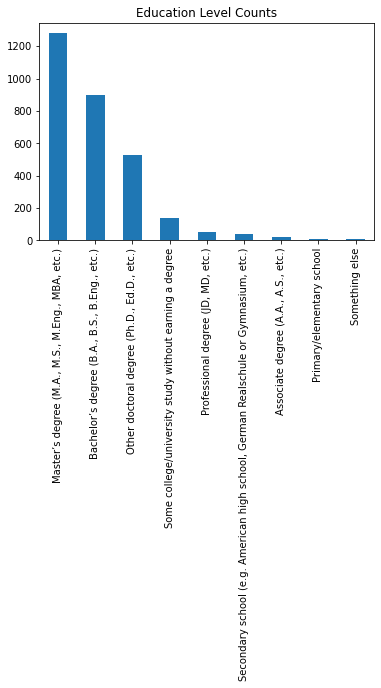

In [ ]:
ed_vals = df2.EdLevel.value_counts()
ed_vals.plot(kind="bar");
plt.title("Education Level Counts");

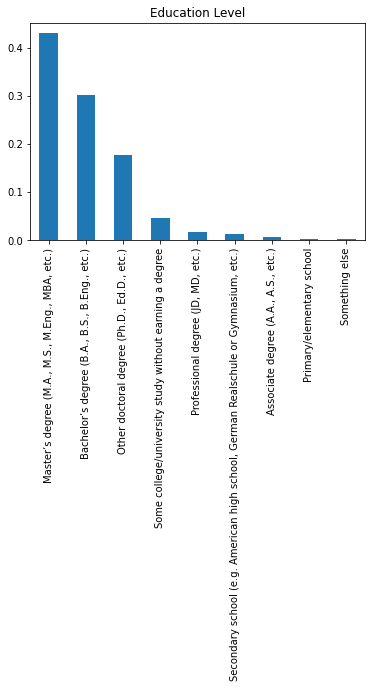

In [ ]:
# a bar chart of the proportion of individuals in ed_vals
(ed_vals/df2.shape[0]).plot(kind="bar");
plt.title("Education Level");

What are different **Country** values in the dataset along with the count of how many individuals are from each country?

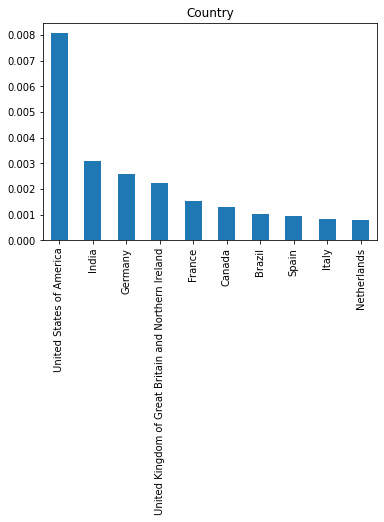

In [ ]:
# a bar chart of the proportion of the top 10 countries 
count_vals = df2.Country.value_counts()
(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

In [ ]:
countries = df2['Country'].value_counts()

countries = countries.to_frame().reset_index()
countries.loc[2]['code'] = 'test'
for i,country in enumerate(countries['index']):
    user_input = country
    if country == 'United States of America':   ### Example of mismatch
      user_input = 'United States'
    mapping = {country.name: country.alpha_3 for country in pycountry.countries}
    countries.loc[i, 'code']=mapping.get(user_input)
data = [ dict(
        type = 'choropleth',
        locations = countries['code'],
        z = countries['Country'],
        text = countries['index'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Total Count'),
      ) ]

layout = dict(
    title = 'Countries Where Data Scientists Responded to the Survey',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)

What are the different **LearnCode** status values in the dataset?

In [ ]:
learn_code_vals = df2.LearnCode.value_counts()

learn_code_vals

School                                                                                                           279
School;Books / Physical media                                                                                    133
Books / Physical media                                                                                           124
Other online resources (ex: videos, blogs, etc);School;Online Courses or Certification;Books / Physical media     99
Other online resources (ex: videos, blogs, etc);School;Books / Physical media                                     95
                                                                                                                ... 
School;Online Forum;Online Courses or Certification;Other (please specify):                                        1
Online Forum;Friend or family member;Other (please specify):                                                       1
Online Forum;Other (please specify):                            

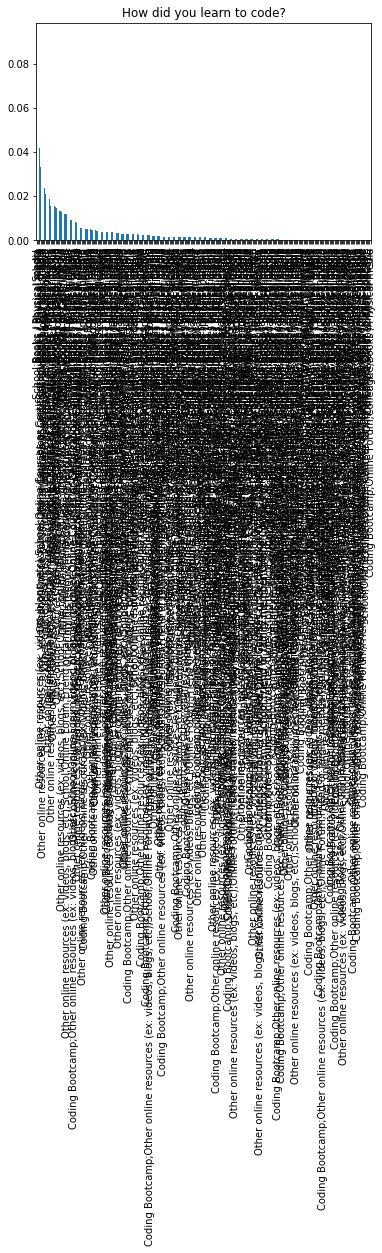

In [ ]:
(learn_code_vals/df2.shape[0]).plot(kind="bar");
plt.title("How did you learn to code?");

We definitely need to clean this.  Above is an example of what happens when you have too many columns to plot. You may either restrict the plotted values or may better transform your data to have less categories.

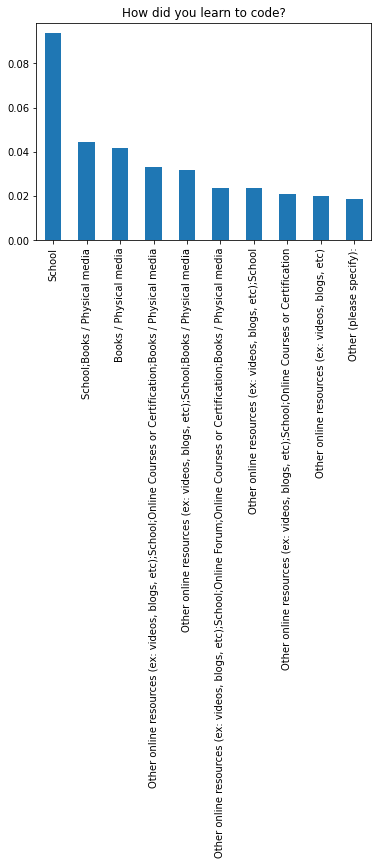

In [ ]:
(learn_code_vals[:10]/df2.shape[0]).plot(kind="bar");
plt.title("How did you learn to code?");

How are education and compensation related?

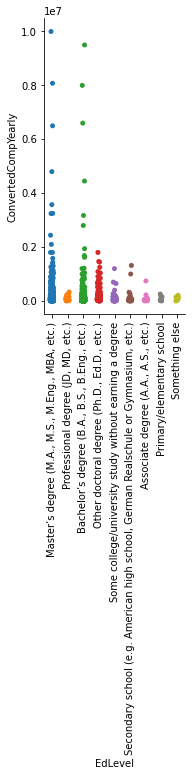

In [ ]:
g = sns.catplot(x="EdLevel", y="ConvertedCompYearly", data=df2,)
g.set_xticklabels(rotation=90) 

It seems like people with MS degree tend to have higher salary and elementary school have the lowest. The order is MS > JD, MD > BS > PhD, EdD > Some college, university >...> Other schools, altough this is not strictly true for everyone, there is a trend like this. 

It is too early to come to a conclusion, but may be MS is better than PhD?

How about the relationship between age and compensation?

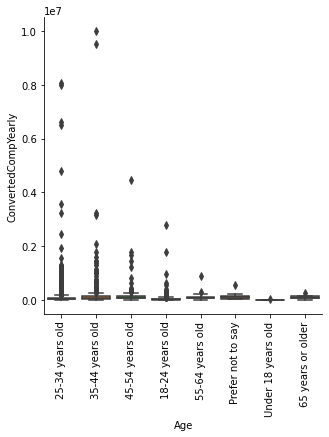

In [ ]:
g = sns.catplot(x="Age", y="ConvertedCompYearly", data=df2, kind='box')
g.set_xticklabels(rotation=90) 

Very high values in compensation, make it hard to understand the box plots. Outliers in the compensation is a big problem. For visualization purposes, just restrict the compensation to be less than 100k.

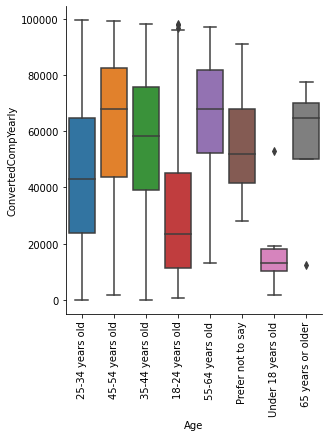

In [ ]:
df3 = df2[df['ConvertedCompYearly']<1e5]
g = sns.catplot(x="Age", y="ConvertedCompYearly", data=df3, kind='box')
g.set_xticklabels(rotation=90) 

Altough the age ranges are not in the expected order in this plot (since it is object type and we will be transforming it to integer during transformations), it is observed that with increasing age, the compensation increases. After 45 years old, it seems to settle down.

Do men and women have similar compensation if they have same education levels?

I want to show an example of split catplot, it requires two hue levels. Therefor, I will restrict the gender to man and woman for this example.

In [ ]:
df3 = df2[df2['Gender'].isin(['Man', 'Woman'])]
df3 = df3[df3['ConvertedCompYearly']<1*1e5]
g = sns.catplot(x="EdLevel", y="ConvertedCompYearly", hue="Gender", kind="violin", inner="stick", split=True,
                palette="pastel", data=df3)
g.set_xticklabels(rotation=90)

Interesting.. Men with MS degree tend to make more money than women with MS degree. Women with JD,MD degree generally make money than men with same degree. On the other hand, if they have PhD,EdD degree or BS degree, they are more or less equal. Of course, this is without taking into account all other factors, but still interesting.

How about the relationship between age, gender and compensation?

In [ ]:
g = sns.catplot(x="Age", y="ConvertedCompYearly", hue="Gender", kind="point", data=df3)
g.set_xticklabels(rotation=90) 

The younger generation (check 18-24 years old) seem to have less difference in terms of gender-compensation relation, but it may be due to very low compensation for that age group. Women that are 45-54 years old seem to be paid less than men in the same age group.

Seaborn's pairplot will only be able to plot numeric columns. Let's see numeric-numeric relationships.

In [ ]:
sns.pairplot(df2)

There is some trend towards increasing compensation with increasing years of coding but not significant.

How is the compansation distributed?

In [ ]:
df2.boxplot(column='ConvertedCompYearly')

Trying to see more details..

In [ ]:
dff = df2[df2['ConvertedCompYearly']<1e5]
dff.boxplot(column='ConvertedCompYearly')

In [ ]:
sns.displot(df2, x="ConvertedCompYearly", kind="kde")

This is a highly skewed distribution. Log transformation may help.

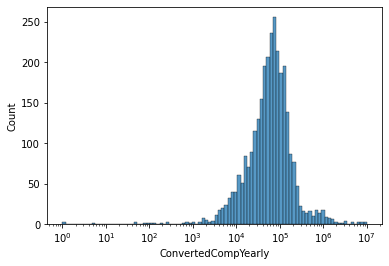

In [ ]:
sns.histplot(df2.ConvertedCompYearly,log_scale=True)

When using log scale, having zero value for the compensation column caused an error, so let's fix it by removing zero values from data.

In [ ]:
df3 = df2[df2['ConvertedCompYearly']>0]
sns.histplot(df3.ConvertedCompYearly,log_scale=True)

### TRANSFORMING DATA

In [ ]:
df3 = df2.copy()

Are there any columns that can benefit from ranking?

Age column was binned and in object format. We can convert it to integers, since ranking is meaningful for age.

In [ ]:
df3.Age.value_counts()

In [ ]:
def upper_age_limit(age_interval):
  list = [int(s) for s in age_interval.replace('-',' ').split() if s.isdigit()]
  # Prefer not to say will return 0 for now
  # in order not to get an error in the function
  if len(list)==0:
    return 0
  return list[-1]

df3["Age"] = df3["Age"].apply(upper_age_limit)
# Replace 0 (which was "Prefer not to say" originally), with the median age
df3["Age"] = df3["Age"].replace(0,df3["Age"].median())
df3.Age.value_counts()

Education Level can also benefit from ranking.

In [ ]:
df3["EdLevel"].value_counts()

In [ ]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1, 2, 3 or 4, more school, greater number
    
    '''
    if formal_ed_str=="Professional degree (JD, MD, etc.)" or formal_ed_str=="Other doctoral degree (Ph.D., Ed.D., etc.)":
      return 4
    elif formal_ed_str=="Master’s degree (M.A., M.S., M.Eng., MBA, etc.)":
      return 3
    elif formal_ed_str=="Bachelor’s degree (B.A., B.S., B.Eng., etc.)":
      return 2
    else:
      return 1

df3["EdLevel"] = df3["EdLevel"].apply(higher_ed)
df3["EdLevel"].value_counts()

Being employed full time and part time can be ranked. Being employed full time should bring ~ 2 times more compensation (our target variable) than part time.

In [ ]:
df3.groupby('Employment').mean()['ConvertedCompYearly']

In [ ]:
df3['Employment'].value_counts()

In [ ]:
df3.loc[(df3['Employment']== 'Employed full-time') | (df3['Employment']== 'Independent contractor, freelancer, or self-employed' ),'Employment'] = 2
df3.loc[df3['Employment']== 'Employed part-time','Employment'] = 1
df3['Employment'].value_counts()

2    2861
1     117
Name: Employment, dtype: int64

Organization size is another column that can be ranked.

In [ ]:
df3.OrgSize.value_counts()

20 to 99 employees                                    560
10,000 or more employees                              534
100 to 499 employees                                  453
1,000 to 4,999 employees                              371
2 to 9 employees                                      284
10 to 19 employees                                    236
500 to 999 employees                                  180
5,000 to 9,999 employees                              158
Just me - I am a freelancer, sole proprietor, etc.    144
I don’t know                                           56
I don't know                                            2
Name: OrgSize, dtype: int64

In [ ]:
def org_size(orgsize):
  # return 1 for freelancers
  if orgsize=="Just me - I am a freelancer, sole proprietor, etc.":
    return 1
  orgsize = orgsize.replace(",","")
  list = [int(s) for s in orgsize.split() if s.isdigit()]
  # Answers with no numbers will return 0
  # in order not to get an error in the function
  if len(list)==0:
    return 0
  else:
    return int(np.mean(list))

df3["OrgSize"] = df3["OrgSize"].apply(org_size)
# Replace 0 (which was "I don't know" originally), with the median OrgSize
df3["OrgSize"] = df3["OrgSize"].replace(0,df3["OrgSize"].median())
df3.OrgSize.value_counts()

AttributeError: ignored

For the remaining categorical columns, we need to use one hot encoder. But, there are two many categories for each column and some of them are very rare, so it may be a good idea to drop the rare columns.

**Dealing with multiple-choice columns**

In [ ]:
df3.columns

In [ ]:
RemainingCatColms = ['Country', 'LearnCode', 'DevType', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth']

for colm in RemainingCatColms:
  # Check if there are multiple entries in this column
  temp = df3[colm].str.split(';', expand=True)
  # Get all the possible values in this column
  new_columns = pd.unique(temp.values.ravel())
  for new_c in new_columns:
    if new_c and new_c is not np.nan:
      # Create new column for each unique column
      idx = df3[colm].str.contains(new_c, regex=False).fillna(False)
      df3.loc[idx, f"{colm}_{new_c}"] = 1
      # Info to the user
      print(f">> Multiple entries in {colm}. Added {len(new_columns)} one-hot-encoding columns")
      # Drop the original column
      df3.drop(colm, axis=1, inplace=True)

  # Group rare categories as Other for each feature
  #df[colm].mask(df[colm].map(df[colm].value_counts(normalize=True)) < 0.01, 'Other')
  #enc_df_colm = pd.DataFrame(OneHotEncoder(min_frequency=0.9, sparse=False).fit(df3[[colm]]).toarray())
  #df3 = df3.join(enc_df_colm).drop(columns=colm)
df3

**Checking Collinearity**

Given the nature of our dataset, we have several features / columns which are highly collinear, which may throw off subsequent analysis. I'll just go with a very simply option of dropping columns that have >0.75 correlations with other columns

In [ ]:
# Create correlation matrix
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop those columns
print(f">> Dropping the following columns due to high correlations: {to_drop}")
df2 = df2.drop(to_drop, axis=1)

**Examples for class:**

In [ ]:
exDf = pd.DataFrame({'Education':['BS','MS','PhD']})
exDf2 = exDf.copy()
exDf

In [ ]:
ed_mapper = {'BS':1, 'MS':2, 'PhD':3}
exDf2['Education'] = exDf2['Education'].replace(ed_mapper)
exDf2

In [ ]:
ordinalencoder = OrdinalEncoder()
exDf ['Education'] = ordinalencoder.fit_transform(exDf[['Education']])
exDf

In [ ]:
exDf2 = pd.DataFrame({'Age':['7','5','35','50'],'Class':['Kids','Kids','Adult','Adult']})
exDf2

In [ ]:
labelencoder = LabelEncoder()
labelencoder.fit_transform(exDf2['Class'])

In [ ]:
exDf3 = pd.DataFrame({'Name':['X','Y','Z'],'Favorite Color':['red','blue','green']})
exDf3

One hot encode using Pandas

In [ ]:
pd.get_dummies(exDf3["Favorite Color"])

One hot encode using Scikit-learn

In [ ]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(exDf3[['Favorite Color']]).toarray())
exDf3 = exDf3.join(enc_df).drop(columns='Favorite Color')
exDf3